<a href="https://colab.research.google.com/github/hima4274/skills-introduction-to-github/blob/main/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [ ]:
import sqlite3
#creates db
conn = sqlite3.connect('superhero_db.sqlite')
cursor = conn.cursor()
#creates all the tables with the specific columns
ddl_statements = '''
DROP TABLE IF EXISTS Heroes;
DROP TABLE IF EXISTS Villains;
DROP TABLE IF EXISTS Battles;

CREATE TABLE Heroes (
    HeroID INTEGER PRIMARY KEY AUTOINCREMENT,
    Name VARCHAR(100) NOT NULL,
    Power VARCHAR(50) NOT NULL,
    Team VARCHAR(50) NOT NULL
);

CREATE TABLE Villains (
    VillainID INTEGER PRIMARY KEY AUTOINCREMENT,
    Name VARCHAR(50) NOT NULL,
    EvilPlan VARCHAR(255) NOT NULL
);

CREATE TABLE Battles (
    BattleID INTEGER PRIMARY KEY AUTOINCREMENT,
    HeroID INT,
    VillainID INT,
    Outcome VARCHAR(50) CHECK (Outcome IN ('Hero Wins', 'Villain Wins', 'Draw')),
    FOREIGN KEY (HeroID) REFERENCES Heroes(HeroID),
    FOREIGN KEY (VillainID) REFERENCES Villains(VillainID)
);
'''
#executes the query above and commits the tables to the database
cursor.executescript(ddl_statements)
conn.commit()
print('Database schema created successfully.')

Database schema created successfully.


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [ ]:
import pandas as pd
import sqlite3

#reads in all the csvs into a pandas dataframe
hero_df = pd.read_csv('heroes.csv')
villain_df = pd.read_csv('villains.csv')
battle_df = pd.read_csv('battles.csv')

#renames the column names in the dataframe to match the column names in the tables
hero_df.rename(columns={'id': 'HeroID', 'name': 'Name', 'power': 'Power', 'team': 'Team'}, inplace=True)
villain_df.rename(columns={'id': 'VillainID', 'name': 'Name', 'evil_plan': 'EvilPlan'}, inplace=True)
battle_df.rename(columns={'id': 'BattleID', 'hero_id': 'HeroID', 'villain_id': 'VillainID', 'outcome': 'Outcome'}, inplace=True)

#populates the tables in the database with data in the dataframes
conn = sqlite3.connect('superhero_db.sqlite')
hero_df.to_sql('Heroes', conn, if_exists='append', index=False)
villain_df.to_sql('Villains', conn, if_exists='append', index=False)
battle_df.to_sql('Battles', conn, if_exists='append', index=False)

print('Data imported successfully.')


Data imported successfully.


## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [ ]:
#all the queries to answer the questions presented
print("1. Retrieve all superheros and their powers")
display(pd.read_sql("SELECT Name, Power FROM Heroes;", conn))

print("2. Find all battles where the hero won.")
display(pd.read_sql("SELECT * FROM Battles WHERE Outcome = 'Hero Wins';", conn))

print("3. List all villains and their evil plans.")
display(pd.read_sql("SELECT Name, EvilPlan FROM Villains;", conn))

print("4. Determine which superhero has fought the most battles.")
display(pd.read_sql("SELECT Heroes.Name, COUNT(Battles.BattleID) AS BattleCount FROM Heroes LEFT JOIN Battles ON Heroes.HeroID = Battles.HeroID GROUP BY Heroes.Name ORDER BY BattleCount DESC LIMIT 1;", conn))

1. Retrieve all superheros and their powers


,Name,Power
0,Spider-Man,Web-slinging
1,Iron Man,Powered Armor
2,Batman,Genius Detective
3,Superman,Super Strength
4,Thor,God of Thunder
5,Wonder Woman,Amazonian Strength
6,Black Panther,Enhanced Agility
7,The Flash,Super Speed
8,Hulk,Super Strength
9,Doctor Strange,Mystic Arts


2. Find all battles where the hero won.


,BattleID,HeroID,VillainID,Outcome
0,2,9,3,Hero Wins
1,5,1,7,Hero Wins
2,7,9,8,Hero Wins
3,8,3,2,Hero Wins
4,9,7,5,Hero Wins
5,13,8,9,Hero Wins
6,20,3,4,Hero Wins
7,29,3,5,Hero Wins
8,30,5,5,Hero Wins


3. List all villains and their evil plans.


,Name,EvilPlan
0,Green Goblin,Terrorize New York
1,Thanos,Collect all Infinity Stones
2,Joker,Spread chaos in Gotham
3,Lex Luthor,Defeat Superman
4,Loki,Trick humanity into worshiping him
5,Ultron,AI world domination
6,Darkseid,Control the universe
7,Venom,Consume Spider-Man
8,Magneto,Mutant supremacy
9,Red Skull,Revive Hydra


4. Determine which superhero has fought the most battles.


,Name,BattleCount
0,Batman,7


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [ ]:
import sqlite3
conn = sqlite3.connect('superhero_db.sqlite')
cursor = conn.cursor()
#creates a table of sidekicks that is connected to the heros by HeroID
ddl_statements = '''
DROP TABLE IF EXISTS Sidekicks;
CREATE TABLE Sidekicks (
    SidekickID INTEGER PRIMARY KEY AUTOINCREMENT,
    HeroID INT,
    Name VARCHAR(100) NOT NULL,
    Power VARCHAR(50) NOT NULL,
    FOREIGN KEY (HeroID) REFERENCES Heroes(HeroID)
);
'''
cursor.executescript(ddl_statements)
conn.commit()

#defines data to be put into the table and then is inserted
sidekicks_data = [
    ('Robin', 'Stealth', 3),
    ('Kid Strange', 'Magic', 10),
    ('Wonder Girl', 'Lasso', 6),
]
cursor.executemany('''
INSERT INTO Sidekicks (Name, Power, HeroID) VALUES (?, ?, ?)
''', sidekicks_data)
conn.commit()

print('Sidekicks table created successfully.')
#queries all sidekicks, thier name, power, and the IDs of their heros
display(pd.read_sql("SELECT Name, Power, HeroID FROM Sidekicks" , conn))


Sidekicks table created successfully.


,Name,Power,HeroID
0,Robin,Stealth,3
1,Kid Strange,Magic,10
2,Wonder Girl,Lasso,6


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

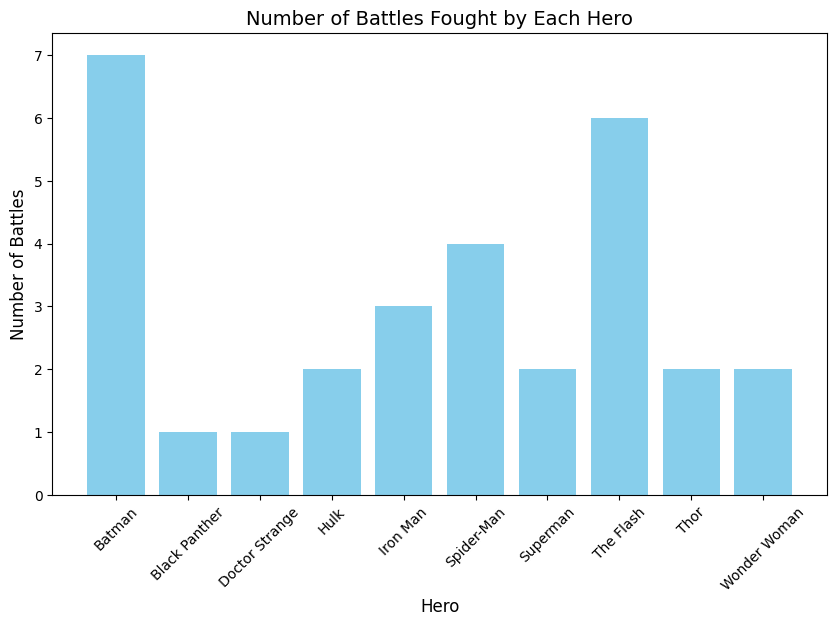

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
#queries for all Hero's names and the amount of battles they have each fought in
query = '''
SELECT Heroes.Name AS Hero, COUNT(Battles.BattleID) AS Battle_Count
FROM Heroes
LEFT JOIN Battles ON Heroes.HeroID = Battles.HeroID
GROUP BY Heroes.Name;
'''
#takes the data grabbed from the query and makes it into a dataframe
battle_counts_df = pd.read_sql(query, conn)
#plot the bar graph figure including the x-val y-val, titles and other formatting
plt.figure(figsize=(10, 6))
plt.bar(battle_counts_df['Hero'], battle_counts_df['Battle_Count'], color='skyblue')
plt.xlabel('Hero', fontsize=12)
plt.ylabel('Number of Battles', fontsize=12)
plt.title('Number of Battles Fought by Each Hero', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!